In [1]:
!pip install torch

     |████████████████████████████████| 753.4 MB 4.0 kB/s  eta 0:00:012


In [2]:
!pip install torchvision

     |████████████████████████████████| 4.0 MB 5.0 MB/s eta 0:00:01


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
ads = pd.read_csv('datasets/ads.csv', index_col=0)
ads.sample(10)

,TV,radio,newspaper,sales
188,191.1,28.7,18.2,17.3
23,13.2,15.9,49.6,5.6
47,89.7,9.9,35.7,10.6
11,66.1,5.8,24.2,8.6
137,25.6,39.0,9.3,9.5
98,184.9,21.0,22.0,15.5
7,57.5,32.8,23.5,11.8
125,229.5,32.3,74.2,19.7
167,17.9,37.6,21.6,8.0
6,8.7,48.9,75.0,7.2


In [8]:
ads.shape

(200, 4)

In [9]:
from sklearn import preprocessing

In [10]:
ads[['TV']] = preprocessing.scale(ads[['TV']])
ads[['radio']] = preprocessing.scale(ads[['radio']])
ads[['newspaper']] = preprocessing.scale(ads[['newspaper']])

In [11]:
ads.sample(10)

,TV,radio,newspaper,sales
163,0.482926,-0.348692,-0.228042,14.9
96,0.189837,0.562876,1.028627,16.9
15,0.666253,0.650657,0.711007,19.0
87,-0.826052,0.286030,-0.669947,12.0
142,0.544814,0.819466,2.073549,19.2
74,-0.206009,-1.185984,0.034340,11.0
62,1.334171,1.312388,1.111484,24.2
137,-1.418069,1.062551,-0.978360,9.5
189,1.622590,-0.632291,-1.236138,15.9
112,1.105304,0.995027,-0.338518,21.8


In [23]:
X = ads.drop('sales', axis=1)

Y = ads[['sales']]

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
y_train.shape

(160, 1)

In [25]:
import torch

In [26]:
x_train_tensor = torch.tensor(x_train.values, dtype=torch.float)
x_test_tensor = torch.tensor(x_test.values, dtype=torch.float)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float)

In [27]:
x_train_tensor.shape, y_train_tensor.shape

(torch.Size([160, 3]), torch.Size([160, 1]))

In [28]:
inp = 3
out = 1

hid = 100

loss_fn = torch.nn.MSELoss()

learning_rate = 0.0001

In [29]:
model = torch.nn.Sequential(torch.nn.Linear(inp, hid),
                           torch.nn.ReLU(),
                           torch.nn.Linear(hid, out))

In [30]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [31]:
for iter in range(10000):
    y_pred = model(x_train_tensor)
    loss = loss_fn(y_pred, y_train_tensor)
    
    if iter % 1000 == 0:
        print(iter, loss.item())
        
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step()

0 226.419921875
1000 126.32328033447266
2000 35.00299072265625
3000 9.633459091186523
4000 6.965553283691406
5000 5.284790992736816
6000 3.7198665142059326
7000 2.404763698577881
8000 1.4051408767700195
9000 0.7755032777786255


In [32]:
y_pred_tensor = model(x_test_tensor)

y_pred_tensor[:5]

tensor([[ 9.8896],
        [ 8.2028],
        [ 9.0927],
        [25.6440],
        [11.5285]], grad_fn=<SliceBackward>)

In [33]:
y_pred = y_pred_tensor.detach().numpy()
y_pred[:5]

array([[ 9.889606 ],
       [ 8.202793 ],
       [ 9.0927305],
       [25.643978 ],
       [11.5284605]], dtype=float32)

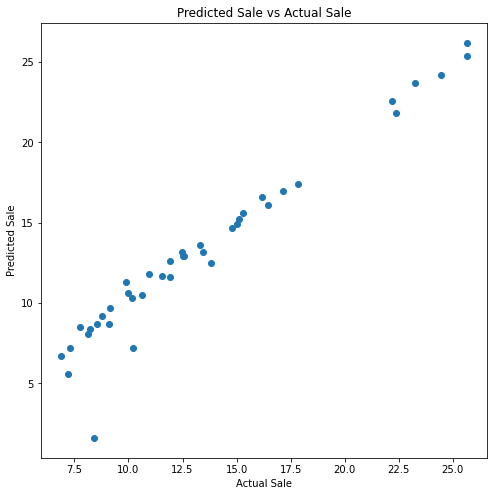

In [35]:
plt.figure(figsize=(8,8))
plt.scatter(y_pred, y_test.values)

plt.xlabel("Actual Sale")
plt.ylabel("Predicted Sale")

plt.title("Predicted Sale vs Actual Sale")
plt.show()

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.946454025303618